# Monte Carlo Testing
We are going to compare the Monte Carlo method with other existing approaches to computing the area underneath a function:
1. Trapezium Method
2. Analytical/Algebraic Method

The function in question is
$$f(x) = e^{\sin(x)}\sin(2x)$$
and we want to compute the integral
$$\int_{0}^\frac{\pi}{2}f(x)dx$$

## Analytical Solution
We use the substitution $u = \sin(x)$, which will leave us with the integral
$$2\int_0^1u\cdot e^{u}du$$
Through integration by parts, we will arrive at the value 2.

## Monte Carlo Method
We will uniformly sample $n$ points from the rectangle $[0,\pi/2] \times [0, 3]$, which has area $\pi/2 \cdot 3 = 3\pi/2$. The proportion of points that land between $y = f(x)$ and $y = 0$ should be directly proportional to the proportion of the area of the rectangle that indicates the area underneath $f(x)$.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import time

def monte_carlo_area(n):
    f = lambda x: np.exp(np.sin(x)) * np.sin(2*x)
    xs = np.random.uniform(low=0, high=np.pi / 2, size=n)
    ys = np.random.uniform(low=0, high=3, size=n)

    f_xs = f(xs)
    conds = ys <= f_xs
    prop = np.mean(conds)
    return prop * 3 * np.pi / 2

In [46]:
limit = 900000
ns = np.linspace(100, limit, 100).astype(int)

start = time.time()
areas = [monte_carlo_area(x) for x in ns]
time.time() - start

1.465599536895752

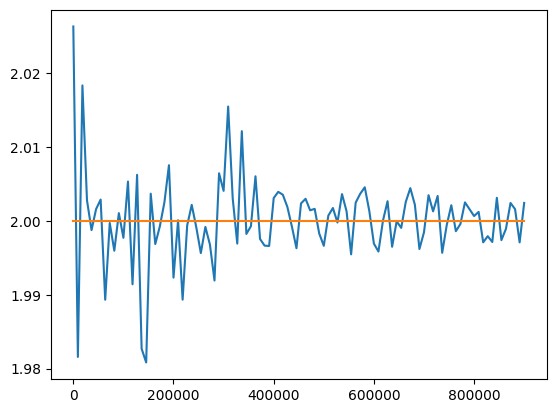

In [47]:
plt.plot(ns, areas)
plt.plot([0, limit], [2, 2])

## Trapezium Method

In [48]:
def trapezium_area(n):
    f = lambda x: np.exp(np.sin(x)) * np.sin(2*x)
    low = 0
    high = np.pi / 2
    spacing = (high - low) / n
    all_xs = np.linspace(low, high, n)
    left_xs = all_xs[:-1]
    right_xs = all_xs[1:]
    left_ys = f(left_xs)
    right_ys = f(right_xs)
    areas = spacing * (left_ys + right_ys) / 2
    return np.sum(areas)


In [49]:
start = time.time()
areas = [trapezium_area(x) for x in ns]
time.time() - start

1.6358931064605713

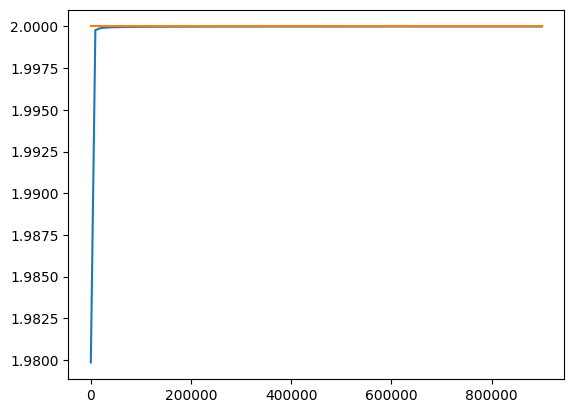

In [50]:
plt.plot(ns, areas)
plt.plot([0, limit], [2, 2])

We can see that the Monte Carlo method is not as accurate, and does not have as clear of a convergence as the trapezium method, but it is slightly faster.

## Importance Sampling Method (Example 4.2)


0.024645259057590366 9.165026537019697e-05


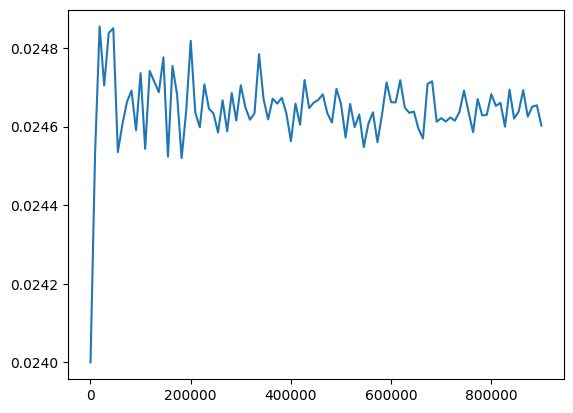

In [60]:
# Sample x uniformly from [0, 1]
def monte_carlo_area_importance_sampling(n):
    xs = np.random.uniform(0, 1, n)

    # For each x, sample y uniformly from [x - 0.06, x]
    ys = np.random.uniform(xs - 0.06, xs)

    f = lambda x: (1 - np.exp(-x)) / np.cos(x)
    f_xs = f(xs)
    conds = (f_xs <= ys) & (ys <= xs)
    prop = np.mean(conds)
    return prop * 0.06

areas = [monte_carlo_area_importance_sampling(n) for n in ns]
print(np.mean(areas), np.std(areas))
plt.plot(ns, areas)

In [58]:
def monte_carlo_area_2(n):
    f = lambda x: (1 - np.exp(-x)) / np.cos(x)
    xs = np.random.uniform(low=0, high=1, size=n)
    ys = np.random.uniform(low=0, high=1, size=n)

    f_xs = f(xs)
    conds = (f_xs <= ys) & (ys <= xs)
    prop = np.mean(conds)
    return prop

0.024708209555217436 0.0006430738095586262


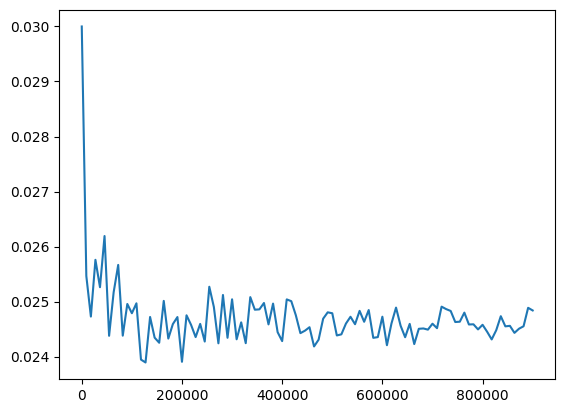

In [61]:
areas = [monte_carlo_area_2(n) for n in ns]
print(np.mean(areas), np.std(areas))
plt.plot(ns, areas)